In [1]:
import os
import sys
sys.path.append("/scratch/users/k21066795/prj_normal/StainNet")
import numpy as np
import pandas as pd
import staintools
from tiatoolbox.tools import stainnorm

import torch
from models import StainNet, ResnetGenerator
from PIL import Image 
import matplotlib.pyplot as plt
%matplotlib inline

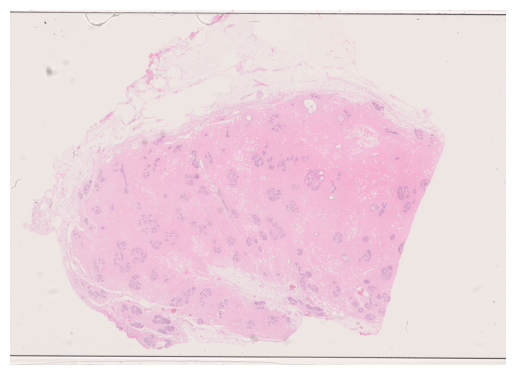

In [16]:
wsi = openslide.OpenSlide(wsi_pt)
wsi_pt = '/scratch/prj/cb_normalbreast/Siyuan/prj_normal/BreastAgeNet/WSIs/KHP_RM/17064108_FPE_1.ndpi'
img = wsi.read_region((0,0), 5, wsi.level_dimensions[5]).convert('RGB')
# gray_image = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
# ret2,th2 = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(255-th2, cmap='gray')
# plt.axis('off')
# plt.savefig("/scratch/prj/cb_normalbreast/Siyuan/prj_normal/BreastAgeNet/temp/17064108_Ostu.png", pad_inches=0, bbox_inches="tight")

plt.imshow(img)
plt.axis('off')
plt.savefig("/scratch/prj/cb_normalbreast/Siyuan/prj_normal/BreastAgeNet/temp/17064108_FPE_1_level5.png", pad_inches=0, bbox_inches="tight")


In [2]:
def norm(image):
    image = np.array(image).astype(np.float32)
    image = image.transpose((2, 0, 1))
    image = ((image / 255) - 0.5) / 0.5
    image=image[np.newaxis, ...]
    image=torch.from_numpy(image)
    return image

def un_norm(image):
    image = image.cpu().detach().numpy()[0]
    image = ((image * 0.5 + 0.5) * 255).astype(np.uint8).transpose((1,2,0))
    return image

#load  pretrained StainGAN
model_GAN = ResnetGenerator(3, 3, ngf=64, norm_layer=torch.nn.InstanceNorm2d, n_blocks=9).cuda().cuda()
model_GAN.load_state_dict(torch.load("/scratch/users/k21066795/prj_normal/StainNet/checkpoints/aligned_cytopathology_dataset/latest_net_G_A.pth"))

<All keys matched successfully>

(-0.5, 511.5, 511.5, -0.5)

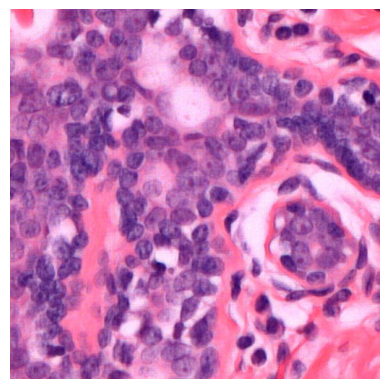

In [6]:
# patches from KHP, NKI, BCI, EPFL, SGK
folder = '/scratch/prj/cb_normalbreast/Siyuan/prj_normal/BreastAgeNet/DATA/multiCohort_patches'

# read target image
img_target=Image.open("/scratch/prj/cb_histology_data/Siyuan/he_shg_synth_workflow/thumbnails/he.jpg") 
# plt.imshow(img_target)

img_file = folder + '/T13-07638 B5 HE [x=23552,y=67584,w=512,h=512].png'
img_source = Image.open(os.path.join(folder, img_file))
plt.imshow(img_source)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

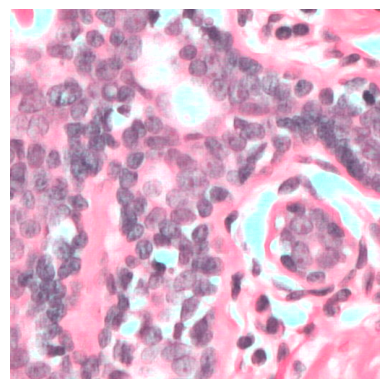

In [7]:
# run reinhard normlization
normalizer = staintools.ReinhardColorNormalizer()
normalizer.fit(np.array(img_target))
reinhard_normalized = normalizer.transform(np.array(img_source))
plt.imshow(reinhard_normalized)
plt.axis('off')
# plt.savefig(f"{folder}/{img_file.replace('.png', 'reinhard.png')}", bbox_inches='tight', pad_inches=0)

(-0.5, 511.5, 511.5, -0.5)

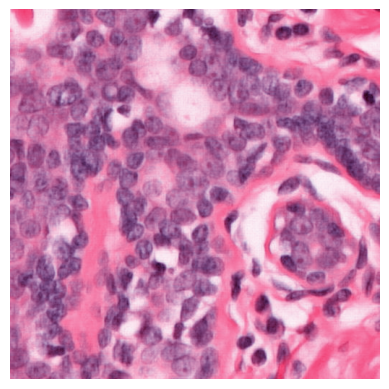

In [8]:
# run macenko normlization
normalizer = staintools.StainNormalizer(method="macenko")
normalizer.fit(np.array(img_target))
macenko_normalized = normalizer.transform(np.array(img_source))
plt.imshow(macenko_normalized)
plt.axis('off')
# plt.savefig(f"{folder}/{img_file.replace('.png', 'macenko.png')}", bbox_inches='tight', pad_inches=0)

(-0.5, 511.5, 511.5, -0.5)

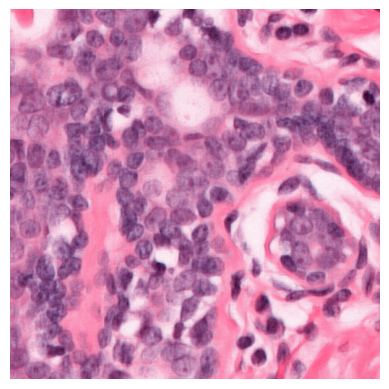

In [9]:
# run Vahadane normlization
stain_normalizer = stainnorm.VahadaneNormalizer()
stain_normalizer.fit(np.array(img_target))
vahadane_normalized = stain_normalizer.transform(np.array(img_source))
plt.imshow(vahadane_normalized)
plt.axis('off')
# plt.savefig(f"{folder}/{img_file.replace('.png', 'vahadane.png')}", bbox_inches='tight', pad_inches=0)

(-0.5, 511.5, 511.5, -0.5)

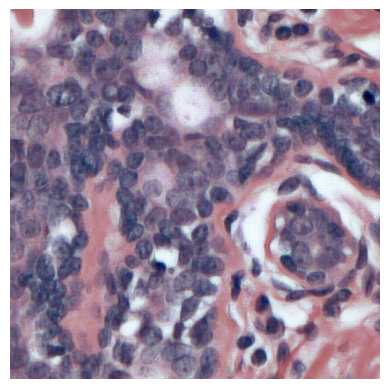

In [10]:
# StainGAN
image_gan=model_GAN(norm(img_source).cuda())
image_gan=un_norm(image_gan)
plt.imshow(image_gan)
plt.axis('off')
# plt.savefig(f"{folder}/{img_file.replace('.png', 'GAN.png')}", bbox_inches='tight', pad_inches=0)